In [1]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def parse_spe_file(file_path):
    """Parse a .spe file and extract metadata and data."""
    metadata = {}
    data = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

    data_section = False

    for line in lines:
        line = line.strip()

        if line.startswith('$'):
            # Metadata keys
            key = line[1:].strip(':')
            metadata[key] = []
            data_section = key == 'DATA'
        elif data_section:
            # Data values
            if not re.match(r'\d+', line):
                continue
            data.extend(map(int, line.split()))
        elif key in metadata:
            # Metadata values
            metadata[key].append(line)

    # Flatten metadata values
    for key, value in metadata.items():
        metadata[key] = ' '.join(value).strip()

    return metadata, np.array(data)

def analyze_data(data):
    """Analyze the numeric data."""
    stats = {
        'min': np.min(data),
        'max': np.max(data),
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data)
    }
    return stats

def plot_data(*data_series, n_ignore=0):
    """Plot multiple data series and display the plot."""
    plt.figure(figsize=(10, 6))

    for i, [metadata, data] in enumerate(data_series):
        # Ignore the highest value in the first n entries for y-limits
        trimmed_data = np.copy(data)
        if n_ignore > 0:
            trimmed_data[:n_ignore] = np.min(data)

        plt.plot(data, label=f'Data {i + 1}')

    plt.title('Spectrum Data')
    plt.xlabel('Channel')
    plt.ylabel('Counts')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_all_data(data_pairs, titles, n_ignore=0):
    """Plot multiple data series in a single figure with subplots."""
    num_plots = len(data_pairs)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6 * num_plots), sharex=True)

    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable for a single subplot

    for ax, ((meta1, data1), (meta2, data2)), title in zip(axes, data_pairs, titles):
        # Ignore the highest value in the first n entries for y-limits
        trimmed_data1 = np.copy(data1)
        trimmed_data2 = np.copy(data2)
        if n_ignore > 0:
            trimmed_data1[:n_ignore] = np.min(data1)
            trimmed_data2[:n_ignore] = np.min(data2)

        ax.plot(data1, label='Detector 1')
        ax.plot(data2, label='Detector 2')  
        ax.set_title(title)
        ax.set_xlabel('Channel')
        ax.set_ylabel('Counts')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
# these are in form [metadata, data]
background_data1 = parse_spe_file("./Data/background1.Spe")
background_data2 = parse_spe_file("./Data/background2.Spe")

am1 = parse_spe_file("./Data/detector1_Am241.Spe")
am2 = parse_spe_file("./Data/detector2_Am241.Spe")

Ba1 = parse_spe_file("./Data/detector1_Ba.Spe")
Ba2 = parse_spe_file("./Data/detector2_Ba.Spe")

Co1 = parse_spe_file("./Data/detector1_Co60.Spe")
Co2 = parse_spe_file("./Data/detector2_Co60.Spe")

Cs1 = parse_spe_file("./Data/detector1_Cs137.Spe")
Cs2 = parse_spe_file("./Data/detector2_Cs137.Spe")

Na1 = parse_spe_file("./Data/detector1_Na22.Spe")
Na2 = parse_spe_file("./Data/detector2_Na22.Spe")

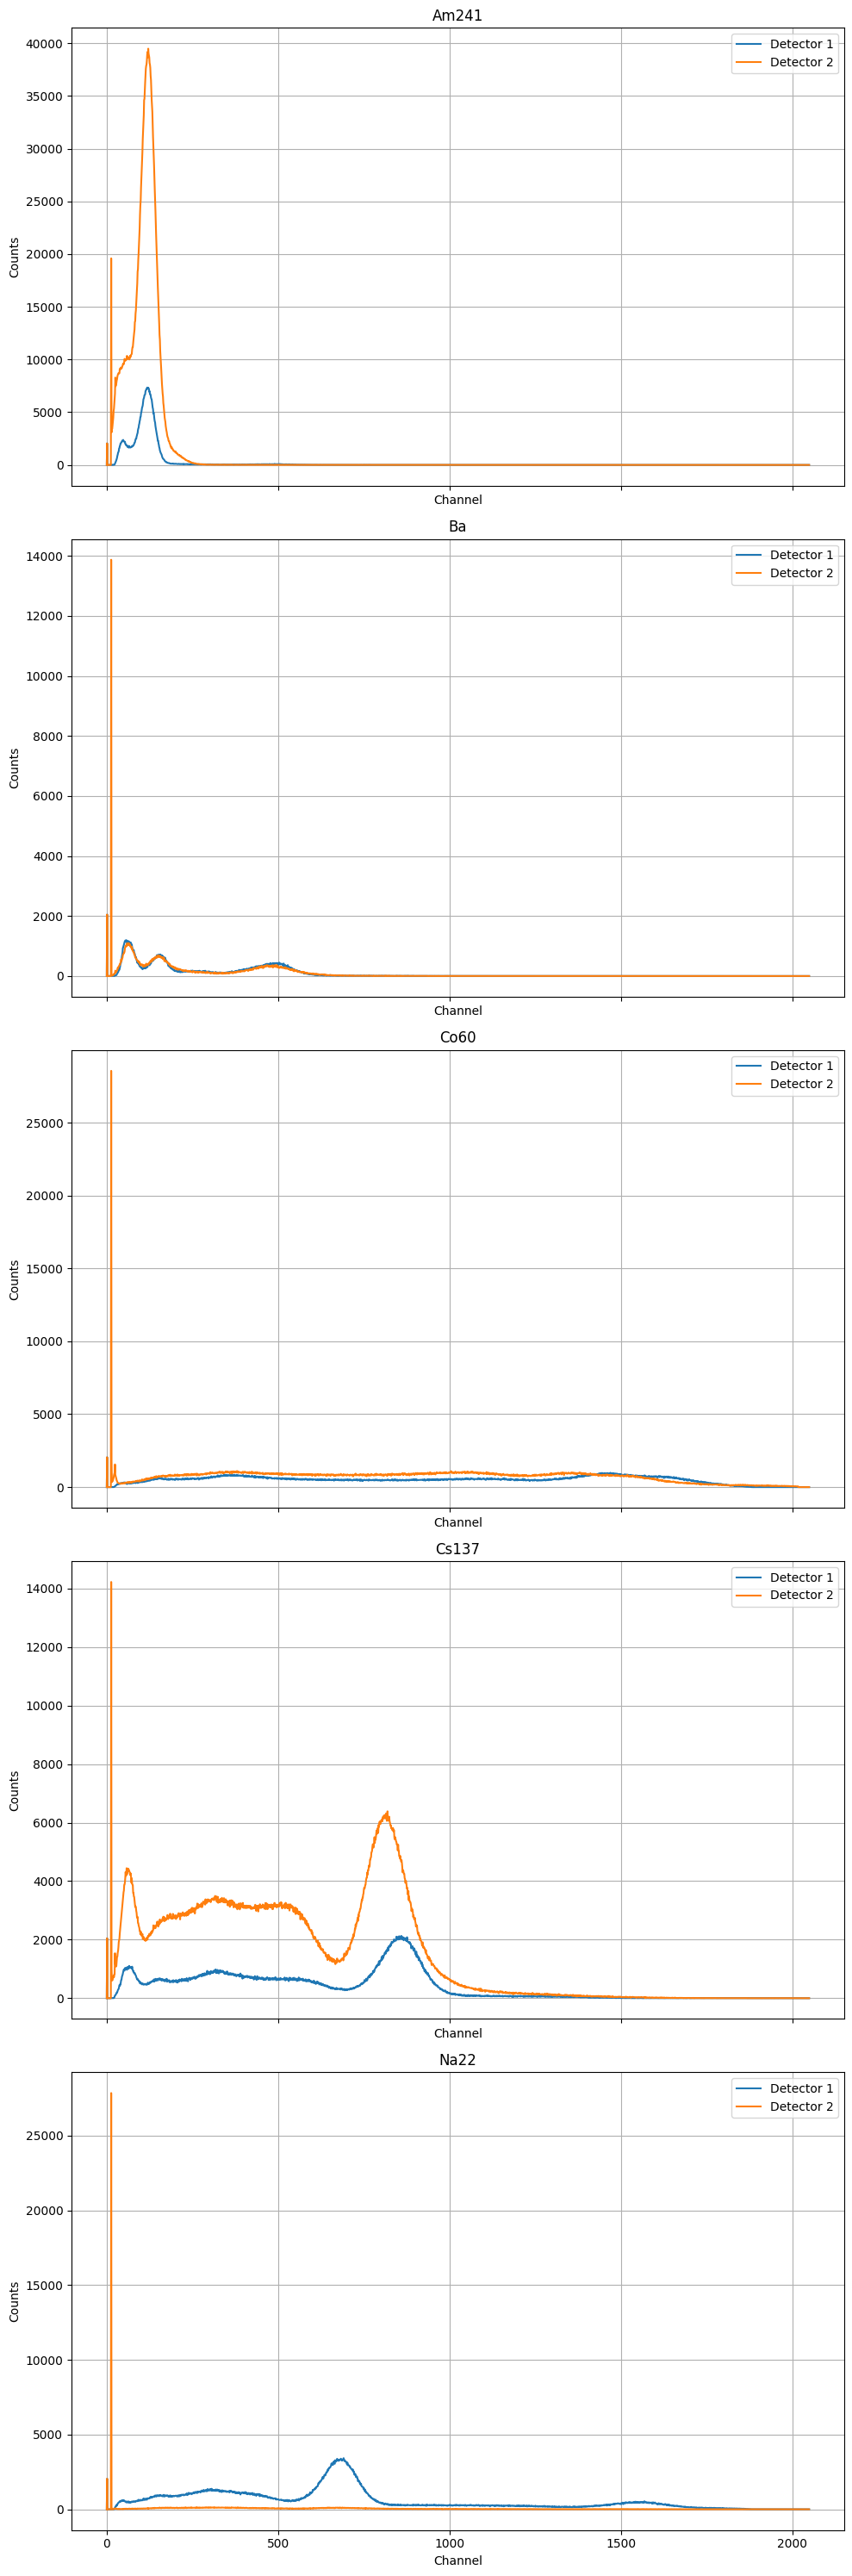

In [51]:
# Prepare data pairs and titles
all_data_pairs = [
    (am1, am2),
    (Ba1, Ba2),
    (Co1, Co2),
    (Cs1, Cs2),
    (Na1, Na2)
]

titles = ["Am241", "Ba", "Co60", "Cs137", "Na22"]

# Generate plots
plot_all_data(all_data_pairs, titles, n_ignore=10)



# if not os.path.exists(file_path):
#     print(f"File not found: {file_path}")
# else:
#     # Parse the .spe file
#     metadata, data = parse_spe_file(file_path)

#     # Display metadata
#     print("Metadata:")
#     for key, value in metadata.items():
#         print(f"  {key}: {value}")

#     # Analyze data
#     stats = analyze_data(data)
#     print("\nData Statistics:")
#     for stat, value in stats.items():
#         print(f"  {stat}: {value}")

#     # Plot data
#     plot_data(data[2:])


In [28]:
print(os.listdir("./Data"))


['120deg_cutbelow_detector2.Spe', 'detector1_Cs137.Spe', 'detector1_Co60.Spe', '60deg_2_cutbelowinthemiddle.Spe', '60deg_1_cutt.Spe', '120deg_cutbelow_detector1.Spe', 'detector1_Am241.Spe', 'detector2_Na22.Spe', 'background1.Spe', '60deg_detector2_notcut.Spe', '90degdetector1photons_mergedpeaks_uncut.Spe', 'background2.Spe', '60deg_cutabove_detector2.Spe', 'detector1_Ba.Spe', '90deg_cutbelow_detector2.Spe', '90deg_cutbelow_detector1.Spe', '60deg_1_notcut.Spe', '120deg_cutabove_measure2_detector2.Spe', '120deg_cutabove_measure2.Spe', '60deg_1_cuttbelowinthemiddle.Spe', '120deg_cutabove_detector1.Spe', '60deg_2_cutt.Spe', 'detector2_Co60.Spe', 'detector2_Cs137.Spe', 'detector2_Ba.Spe', '120deg_cutabove.Spe', '90deg_cutabove_detector1.Spe', 'detector1_Na22.Spe', 'detector2_Am241.Spe', '90deg_cutabove_detector2.Spe', 'test.Spe']


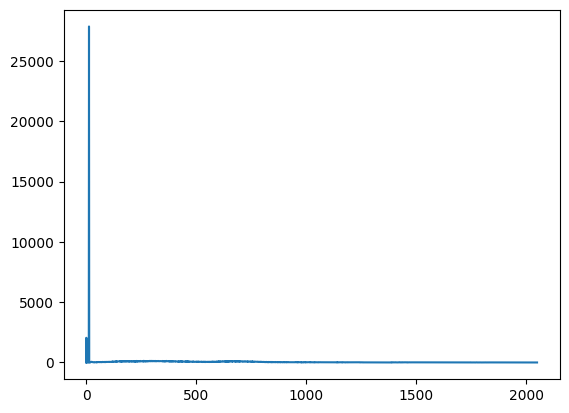